## Workshop 1 : Adding-Sunglasses-to-Your-Passport-Photo-Using-OpenCV

### Name: Mahalakshmi R
### Regno: 212223230116

Text(0.5, 1.0, 'face')

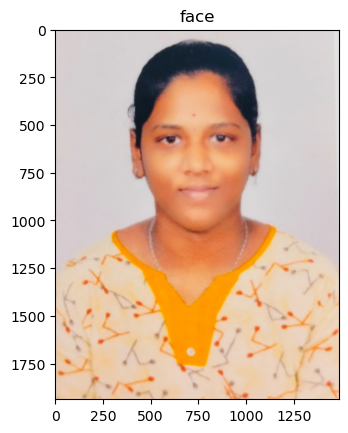

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
faceimage = cv2.imread(r"C:\Users\admin\OneDrive\Pictures\MR.png")
plt.imshow(faceimage[:,:,::-1]);plt.title("face")

Text(0.5, 1.0, 'GLASSPNG')

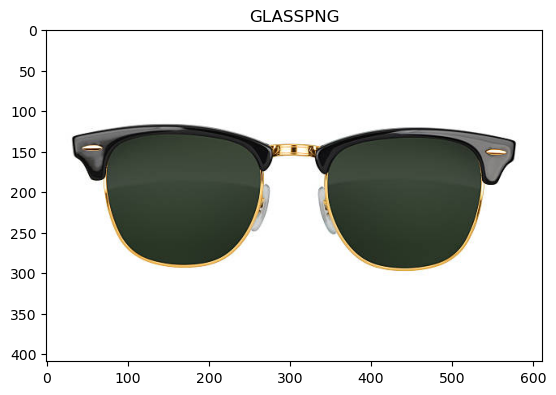

In [5]:
glasspng = cv2.imread(r"C:\Users\admin\OneDrive\Desktop\glass.jpg", -1)
plt.imshow(glasspng[:,:,::-1]);plt.title("GLASSPNG")

BGR shape: (409, 612, 3)
Alpha shape: (409, 612)


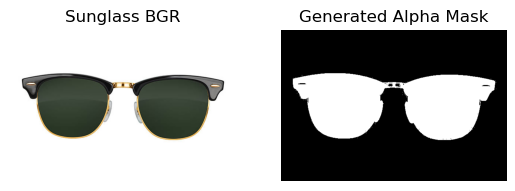

In [7]:
import cv2
import matplotlib.pyplot as plt

# Use raw string (r"...") OR forward slashes
glasspng = cv2.imread(r"C:\Users\admin\OneDrive\Desktop\glass.jpg")

b, g, r = cv2.split(glasspng)
glass_bgr = cv2.merge((b, g, r))
gray = cv2.cvtColor(glasspng, cv2.COLOR_BGR2GRAY)

_, glass_alpha = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

print("BGR shape:", glass_bgr.shape)
print("Alpha shape:", glass_alpha.shape)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(glass_bgr, cv2.COLOR_BGR2RGB))
plt.title("Sunglass BGR")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(glass_alpha, cmap="gray")
plt.title("Generated Alpha Mask")
plt.axis("off")

plt.show()


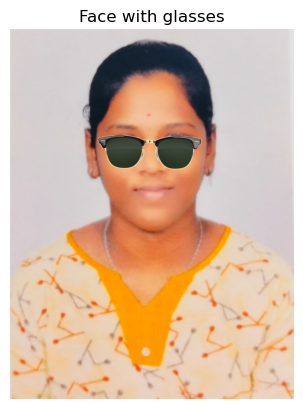

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load face image
face_img = cv2.imread(r"C:\Users\admin\OneDrive\Pictures\MR.png")
face_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

# Load sunglasses (BGR + alpha mask from your previous step)
glass_bgr = cv2.imread(r"C:\Users\admin\OneDrive\Desktop\glass.jpg")
gray = cv2.cvtColor(glass_bgr, cv2.COLOR_BGR2GRAY)
_, glass_alpha = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Eye detector
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
eyes = eye_cascade.detectMultiScale(face_gray, 1.2, 5)

# Filter out eyes from the top half of face
h, w = face_img.shape[:2]
eyes = [e for e in eyes if e[1] < h//2]  

# Sort by width (largest boxes → actual eyes)
eyes = sorted(eyes, key=lambda x: -x[2])[:2]

if len(eyes) == 2:
    # Sort left-right
    eyes = sorted(eyes, key=lambda x: x[0])
    x1, y1, w1, h1 = eyes[0]
    x2, y2, w2, h2 = eyes[1]

    # Eye centers
    left_eye = (x1 + w1//2, y1 + h1//2)
    right_eye = (x2 + w2//2, y2 + h2//2)

    # Glasses size = distance between eyes * scale
    eye_distance = int(((right_eye[0] - left_eye[0])**2 + (right_eye[1] - left_eye[1])**2)**0.5)
    glasses_w = int(eye_distance * 2.2)  # adjust scale factor
    glasses_h = int(glass_bgr.shape[0] * (glasses_w / glass_bgr.shape[1]))

    # Resize glasses
    glasses_resized = cv2.resize(glass_bgr, (glasses_w, glasses_h))
    mask_resized = cv2.resize(glass_alpha, (glasses_w, glasses_h))

    # Position (centered between eyes, slightly above)
    center_x = (left_eye[0] + right_eye[0]) // 2
    center_y = (left_eye[1] + right_eye[1]) // 2
    x_offset = center_x - glasses_w // 2
    y_offset = center_y - glasses_h // 3

    # Overlay
    roi = face_img[y_offset:y_offset+glasses_h, x_offset:x_offset+glasses_w]
    mask_inv = cv2.bitwise_not(mask_resized)

    bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    fg = cv2.bitwise_and(glasses_resized, glasses_resized, mask=mask_resized)

    combined = cv2.add(bg, fg)
    face_img[y_offset:y_offset+glasses_h, x_offset:x_offset+glasses_w] = combined

# Show result
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face with glasses")
plt.show()


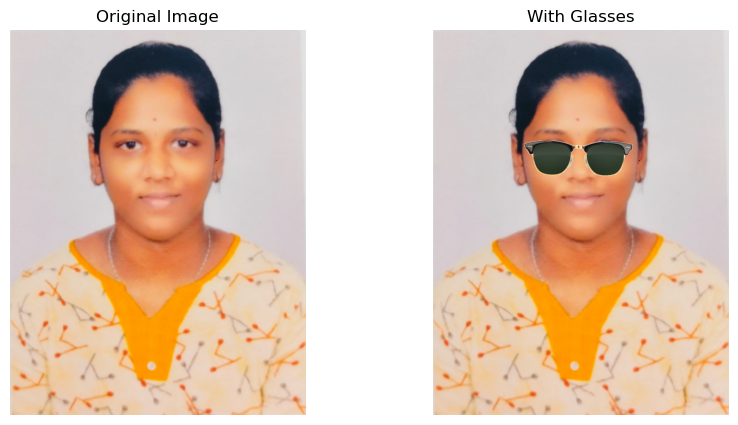

In [9]:
import matplotlib.pyplot as plt
import cv2

# Show side by side
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(faceimage, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Image with glasses
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.title("With Glasses")
plt.axis("off")

plt.show()
